# WPO 2
[Oefening 1](#oef1)

[Oefening 2](#oef2)
***

In [1]:
import numpy as np # numerical calculations in python
from scipy.optimize import fmin, fsolve
from scipy.misc import derivative
import matplotlib.pyplot as plt # package for plotting
from matplotlib import rc
#rc('text', usetex=True)

# allow to show plots inline
%matplotlib inline 

<a id="oef1"></a> 
## Oefening 1:
Gegeven een normaal verdeelde dataset:
### $f(x_{i}|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{\left(x_{i}-\mu\right)^2}{2\sigma^2}} $
Schat de paramters $\mu$ en $\sigma$ m.b.v. de maximum likelihood methode. Bepaal de onzekerheden op deze geschatte parameters, zowel grafisch als analytisch.

In [2]:
MU = 1.3
SIGMA = 4.5
data = np.random.normal(MU,SIGMA,1000)

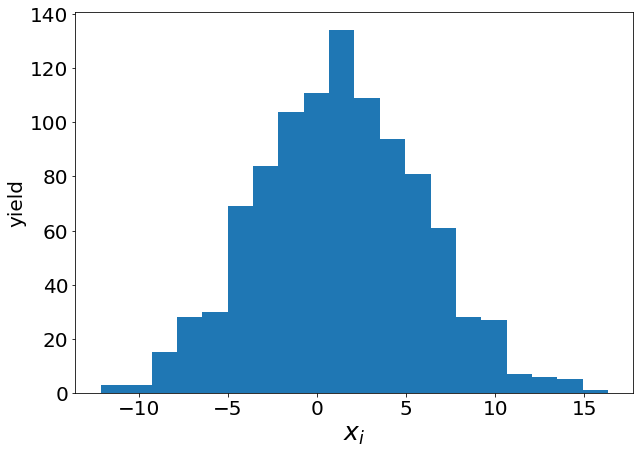

In [3]:
# Toon de histogram 
fig = plt.figure(figsize=[10,7]) 
ax = fig.add_subplot(1, 1, 1)
ax.hist(data, 20)
plt.xlabel('$x_{i}$',fontsize=25);
plt.ylabel('yield',fontsize=20);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

In [4]:
def normalpdf(x,mu,sigma):
    # return de kansverdelingsfunctie van een normale verdeling

IndentationError: expected an indented block after function definition on line 1 (3176748329.py, line 2)

In [5]:
# plot de histogram samen met de theoretische kansverdelingsfunctie
_x = np.arange(-15,15,0.1)
_y = normalpdf(_x,MU,SIGMA)
fig2 = plt.figure(figsize=[10,7]) 
ax2 = fig2.add_subplot(1, 1, 1)
ax2.hist(data, 20,density=True, label="normalized histogram") # density=True will normalize the histogram to 1!
ax2.plot(_x,_y, label="PDF $f(x_{i}|\mu=%.1f, \sigma=%.1f)$"%(MU,SIGMA))
plt.xlabel('$x_{i}$',fontsize=25);
plt.ylabel('$f(x_{i} | \mu, \sigma)$',fontsize=20);
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax2.legend(fontsize=16, loc='upper left')

NameError: name 'normalpdf' is not defined

In [6]:
# definieer de negatieve log likelihood. Ik heb dit zowel via een functie als via een "lambda functie" gedaan.
# de eerste functie is handig om the plotten, the tweede voor de minimalisatie

def LogL(q):
    # return -logL
LogL_fun = lambda q: ## -logL
# minimaliseer de -LogL en bepaal de parameters mu en sigma

IndentationError: expected an indented block after function definition on line 4 (2928117148.py, line 6)

### Onzekerheid via de visuele methode

####  Voor het gemiddelde

Bepaal via de visuele methode de onzekerheid op $\mu$
 
tip:

$Log(L(\mu,\hat{\sigma})) - Log(L(\hat{\mu},\hat{\sigma})) -s^2/ 2 = 0$


#### voor de standaardafwijking

In [7]:
# en op sigma

#### Plot de resultaten

In [8]:
# toon visueel hoe de -logL varieert met je parameters mu en sigma, 
# waar het minimum zich bevindt en waar het onzekerheidsinterval zich bevindt.

### Onzekerheid met de analytische methode
tip:   $\sigma_{\mu}^2 = \left( \partial^2 Log(L) / \partial \mu^2 \right)^{-1} | \mu = \hat{\mu}, \sigma = \hat{\sigma}$

In [9]:
def partial_second_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(args)
    return derivative(wraps, point[var], dx = 1e-6, n=2)

## Bepaal ook aan de hand van de analytische methode de onzekerheden op mu en sigma

<a id="oef2"></a> 
## Oefening 2:
Gegeven dezelfde normaal verdeelde dataset als in de vorige oefening:
### $f(x_{i}|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{\left(x_{i}-\mu\right)^2}{2\sigma^2}} $
Schat de paramters $\mu$ en $\sigma$ m.b.v. de kleinste kwadraten methode. Bepaal de onzekerheden (grafisch) op deze geschatte parameters

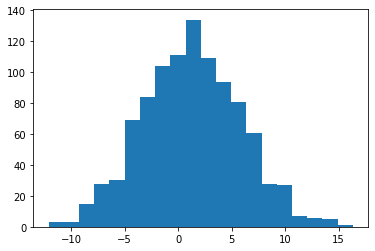

In [10]:
# voor de kleinste kwadraten methode zal je de data moeten opdelen in bins van een histogram.
nbins = 20
bincontent, binedges, patches = plt.hist(data, nbins);
binsize = np.abs(binedges[1] - binedges[0])
bincenters = np.asarray([i-binsize/2. for i in binedges])
bincenters = bincenters[1:] # the first binedge is the left edge, so it should not be counted here

#### definieer de chi2 aan de hand van de gemeten en de voorspelde inhoud van elke bin.

In de $\chi^2$ zal je dus de inhoud van elke bin vergelijken met de voorspelde inhoud volgens de kansverdelingsfunctie $f(x_{i}|\mu,\sigma)$. Maar die kansverdelingsfunctie is genormaliseerd! Je kan bijvoorbeeld de waarde van $f(x_{i}|\mu,\sigma)$ evalueren in het midden van een gegeven bin (bincenters hierboven), maar dat geeft je een getal tussen 0 en 1. Om echt het aantal verwachte events te bekomen moet je dat nog vermigvuldigen met een bepaalde factor. Welke? 

tip: Hoe meer events je genereert, hoe groter de inhoud van elke bin zal zijn, dus het aantal datapunten zal deel uitmaken van je normalisatie! Maar ook de breedte van je bin speelt natuurlijk een rol, want hoe breder je de bin maakt, hoe meer datapunten erin zullen vallen! Dus ook dat zal deel uitmaken van je normalisatie! 

denk als volgt: De kans dat een datapunt in het interval [x1,x2] terecht komt wordt in principe gegeven door de integraal van $f(x_{i}|\mu,\sigma)$ tussen die twee punten $(\int_{x_{1}}^{x_{2}}f(x|\mu,\sigma) dx)$. Echter ga je dat nu benaderen door $f$ te evalueren in het centrum van de bin (noem het $x_c$):

#### $\int_{x_{1}}^{x_{2}}f(x_c|\mu,\sigma) dx $
#### = $f(x_c|\mu,\sigma) \cdot \int_{x_{1}}^{x_{2}} dx $
#### = $f(x_c|\mu,\sigma) \cdot \Delta x $ (met $\Delta x$ de binbreedte)

Die laatste uitdrukking geeft je dus jouw benadering voor de kans dat een datapunt in die bin valt. Dat moet je dan nog normaliseren met het aantal datapunten N, nl: $f(x_c|\mu,\sigma) \cdot \Delta x \cdot N$. Dit is nu je verwachtte aantal events in die bin, en dat kan je vergelijken met het geobserveede aantal uit de histogram!

#### Vraag: Wat is de onzekerheid op de inhoud van een bin in een histogram met N entries? tip: je telt in een bin het aantal voorvallen in een gegeven interval [x1,x2]. Denk hierbij aan het geval van radioactiviteit waarbij je het aantal vervallen telt in een tijdsinterval [t1,t2]!

#### $\chi^2$ in woorden
### $\chi^2 = \sum\limits_{i = 1}^{N} \frac{\left(\text{observed}_i - \text{expected}_i\right)^2}{\left(\text{onzekerheid_i}\right)^2}$

#### $\chi^2$ in symbolen: veronderstel N meetpunten van een grootheid $y$ als functie van een andere grootheid $x$:

situatie 1: bijvoorbeeld meet de tijd als functie van de afstand, of de Intensiteit als functie van de gereflecteerde hoek of het aantal radioactieve vervallen nadat het een materiaal heeft doorkruisd, als functie van de dikte van dat materiaal, etc... --> er bestaat een theoretisch verband $y = f(x|\vec{\theta})$ die de twee relateert.

situatie 2: een histogram die een benadering geeft voor een kansverdelingsfunctie $y = f(x|\vec{\theta})$ als functie van de observaties (en te schatten parameters). De bins geven je dan een aantal discrete $x$ waarden, en de inhoud van elke bin geeft je dan een reeks overeenkomstige $y$ waarden die ja kan vergelijken met de kansverdelingsfunctie $f_X$.

### $\chi^2 = \sum\limits_{i = 1}^{N} \frac{\left(y_i - f(x_i|\vec{\theta})\right)^2}{\sigma_{i}^2}$

Waarbij $y_i$ de waargenomen y-waarden (of bin-contents) zijn bij het pun $x_i$, en $f(x_i|\vec{\theta})$ de theoretisch voorspelde y-waarden bij het punt $x_i$. $\sigma_{i}$ is de onzekerheid op de $i$-de meetwaarde van $y$.

In het speciaal geval van situatie 2 (histogram) geeft dit een specifieke uitdrukking. Veronderstel dat je N bins hebt, en dat je een totaal van $n$ metingen hebt gedaan die je in die N bins hebt verdeeld, met een theoretische PDF $f_{X}(x_i|\vec{\theta})$ dan wordt de $\chi^2$ gedefinieerd als:

### $\chi^2 = \sum\limits_{i = 1}^{N} \frac{\left(y_i - \Delta x \cdot n \cdot f_{X}(x_i|\vec{\theta})\right)^2}{\Delta x \cdot n \cdot f_{X}(x_i|\vec{\theta})}$

waarbij de onzekerheid $\sigma_{i}$ wordt vervangen door de poisson onzekerheid ($\sqrt{n_i}$) van het aantal voorspelde events in bin $i$.

##### Deze ga je nu weer minimaliseren t.o.v. de paramteres $\vec{\theta}$




In [11]:

def chi2(q):
    # return chi2
chi2_fun = lambda q: # return chi2
# minimaliseer de chi2 om zo mu en sigma te bepalen

IndentationError: expected an indented block after function definition on line 1 (1227536059.py, line 3)

In [12]:
# plot histogram met theoretische pdf aan de hand van de parameters die je hebt geschat met de chi2 methode 
#(en vergelijk met de parameters uit de likelihood methode)

### Onzekerheid met de visuele methode

####  For the mean

In [13]:
# onzekerheid op mu (visueel voor chi2 methode)

#### For the standard deviation

In [14]:
# onzekerheid op sigma

In [15]:
# toon visueel hoe de chi2 varieert met je parameters mu en sigma, 
# waar het minimum zich bevindt en waar het onzekerheidsinterval zich bevindt.

### Vraag: Hoe hangen je resultaten af van het aantal bins dat je hebt gekozen?